In [80]:
import pandas as pd
import os
import numpy as np 
import datetime

In [61]:
df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [62]:
df.shape

(18383, 6)

In [63]:
files = [file for file in os.listdir('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

In [64]:
for file in files:
    print(file)
    

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [71]:
all_months_data = pd.DataFrame()


In [72]:
for file in files:
    df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
   
    

In [73]:
all_months_data.shape

(186850, 6)

In [74]:
len(all_months_data)

186850

In [87]:
 all_months_data['Order Date']
    

0        04/19/19 08:46
1                   NaN
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186850, dtype: object

In [97]:
all_months_data = all_months_data.drop([1])

In [98]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [99]:
all_months_data.reset_index(drop = True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186833,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186834,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186835,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186836,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [102]:
all_months_data[all_months_data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
all_months_data = all_months_data.dropna(how='all')

In [104]:
all_months_data[all_months_data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [108]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2]!='Or']
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [109]:
all_months_data['month'] = pd.DatetimeIndex(all_months_data['Order Date']).month

In [111]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [112]:
all_months_data.month.unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [113]:
all_months_data.groupby('month').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
month,,,,,,
1,9708,9708,9708,9708,9708,9708
2,11974,11974,11974,11974,11974,11974
3,15152,15152,15152,15152,15152,15152
4,18279,18279,18279,18279,18279,18279
5,16565,16565,16565,16565,16565,16565
6,13553,13553,13553,13553,13553,13553
7,14292,14292,14292,14292,14292,14292
8,11960,11960,11960,11960,11960,11960
9,11620,11620,11620,11620,11620,11620


In [115]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

In [116]:
all_months_data['sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

In [117]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [121]:
all_months_data.groupby('month').sum().sort_values('sales',ascending = False)

,Quantity Ordered,Price Each,sales
month,,,
12,28113,4.587815e+06,4.612843e+06
10,22702,3.715165e+06,3.736337e+06
4,20558,3.367671e+06,3.390670e+06
11,19796,3.180589e+06,3.199579e+06
5,18666,3.135121e+06,3.152603e+06
3,17004,2.791193e+06,2.807085e+06
7,16071,2.632240e+06,2.647476e+06
6,15252,2.560326e+06,2.576102e+06
8,13447,2.230245e+06,2.244368e+06


In [122]:
results = all_months_data.groupby('month').sum()

In [123]:
results

,Quantity Ordered,Price Each,sales
month,,,
1,10902,1.811753e+06,1.822242e+06
2,13448,2.188881e+06,2.202019e+06
3,17004,2.791193e+06,2.807085e+06
4,20558,3.367671e+06,3.390670e+06
5,18666,3.135121e+06,3.152603e+06
6,15252,2.560326e+06,2.576102e+06
7,16071,2.632240e+06,2.647476e+06
8,13447,2.230245e+06,2.244368e+06
9,13107,2.084980e+06,2.097536e+06


<function matplotlib.pyplot.show(close=None, block=None)>

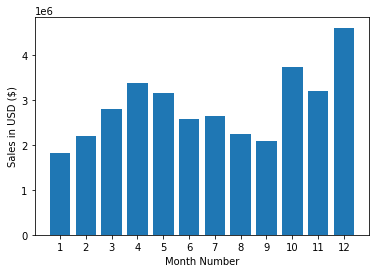

In [144]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

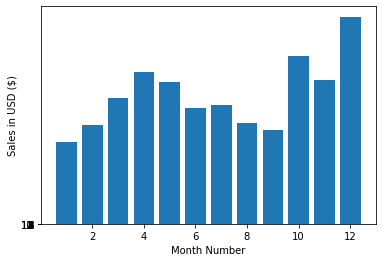

In [145]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['sales'])
plt.yticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show

In [135]:
months = range(0,6)


<BarContainer object of 6 artists>

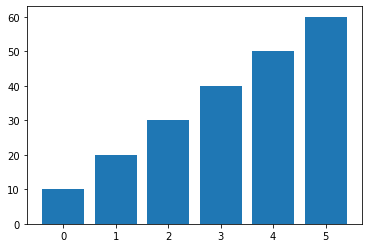

In [136]:
plt.bar(months,[10,20,30,40,50,60])

In [158]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2]

all_months_data['city'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))

In [161]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data['city'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [156]:
all_months_data = all_months_data.drop(columns='column')

In [165]:
def get_state(address):
    return address.split(',')[2]
all_months_data['Purchase Address'].apply(lambda x: get_state(x)).head()

0     TX 75001
2     MA 02215
3     CA 90001
4     CA 90001
5     CA 90001
Name: Purchase Address, dtype: object

In [166]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [168]:
all_months_data.groupby(all_months_data['city']).sum().sort_values('sales')

,Quantity Ordered,Price Each,month,sales
city,,,,
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Austin TX,11148,1.809835e+06,69806,1.819519e+06
Portland OR,11302,1.860543e+06,70620,1.870717e+06
Seattle WA,16552,2.732996e+06,104934,2.747455e+06
Dallas TX,16728,2.752524e+06,104607,2.767872e+06
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
New York City NY,27931,4.634771e+06,175729,4.663717e+06
Los Angeles CA,33288,5.421045e+06,208315,5.452181e+06
